# Saving and loading observables to/from disk

In [1]:
import numpy
import pyobs

%matplotlib notebook

First let's create an obseervable

In [2]:
N=5000 # number of configs
mu = 0.5 # central values
cov = (mu*0.5)**2 # error^2

# autocorrelation time
tau=4.0

rng = pyobs.random.generator('tutorial')
data = rng.acrand(mu,cov,tau,N)

yobs = pyobs.observable()
yobs.create('ensA',data)
yobs

Random generator initialized with seed = 649309182 [tutorial]


0.382(64)

and let's add a systematic error (to test both the `data` and `cdata` subclasses)

<IPython.core.display.Javascript object>


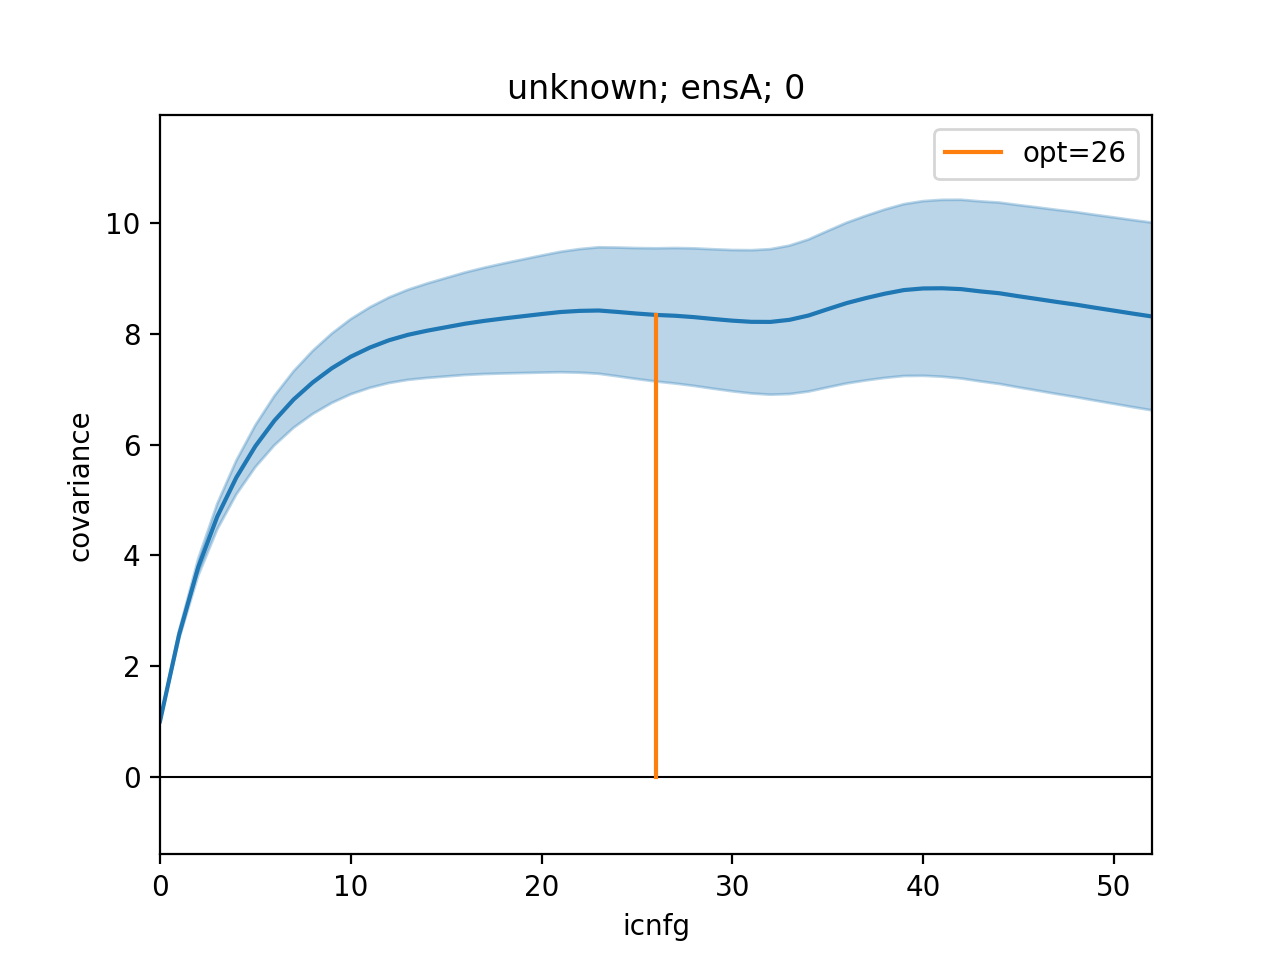

<IPython.core.display.Javascript object>


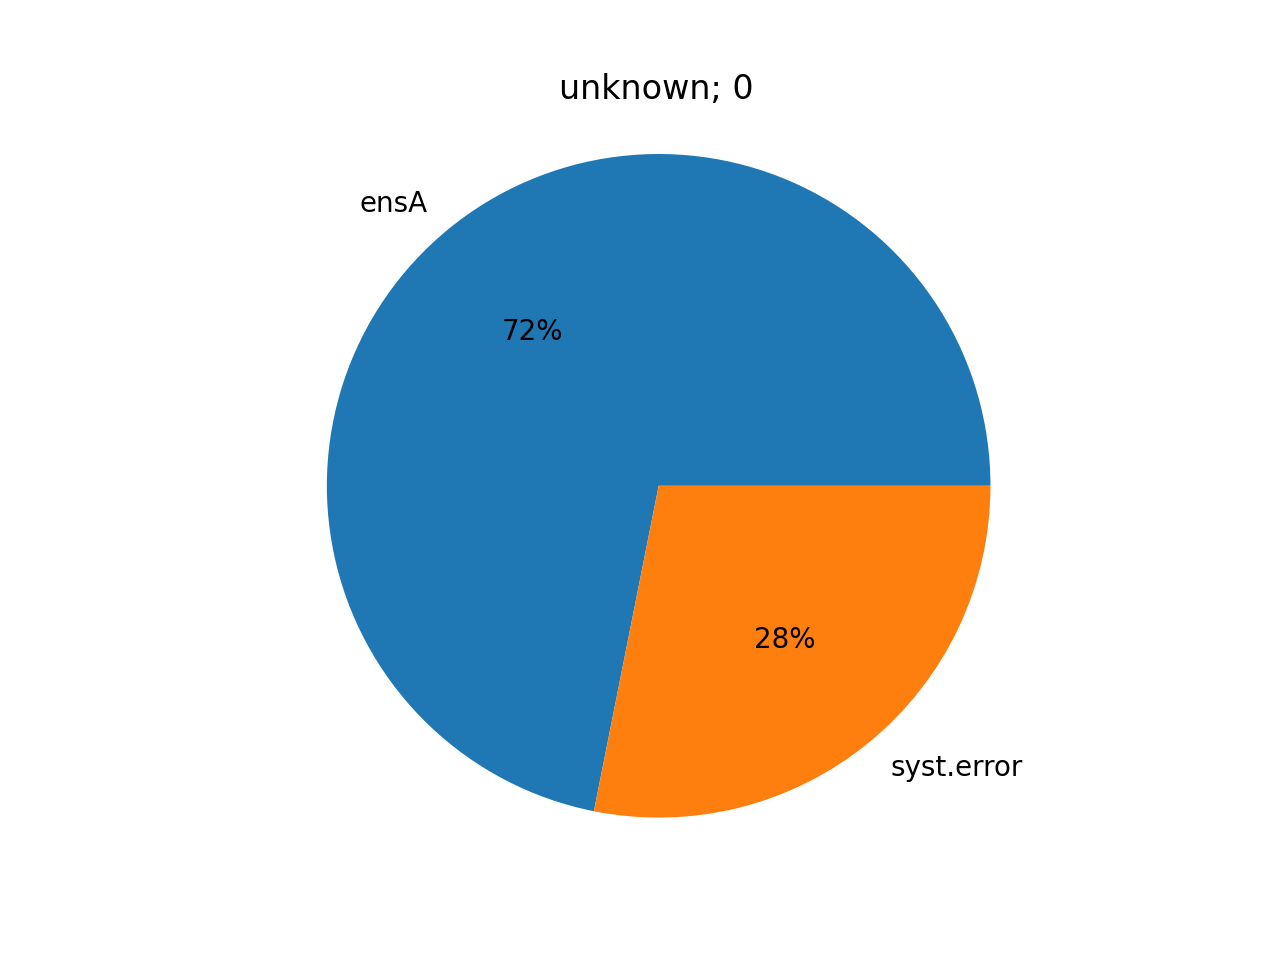

[array([0.38171713]), array([0.07542139])]

In [3]:
yobs.add_syst_err('syst.error',[0.04])
yobs.error(plot=True)

If we use the [bison](https://mbruno46.github.io/bison/) file format we can save any python type to disk, including numpy arrays and observables. For simplicity we store all the relavant data in a dictionary.

In [4]:
pyobs.save('./test-obs.pyobs',{
    'yobs': yobs, 'metadata': 'some text describing the observable',
    'parameter1': 0.345, 'array': numpy.array([0,4,5,7],dtype=numpy.int32)
});

[Bison] : Written 0.0411558 MB at 62.453 MB/s


We check that the file has been created

In [5]:
%ls -al test-obs.pyobs

-rw-r--r--  1 mbruno  staff  43155 Aug  7 01:52 test-obs.pyobs


We reload the file. As expected the returned object is a dictionary. Note the type of the numpy array is also preserved.

In [6]:
pyobs.load('./test-obs.pyobs')

[Bison] : Reading file ./test-obs.pyobs
[Bison] : File created by mbruno at macthxbruno.fritz.box on Sat Aug  7 01:52:25 2021
[Bison] : Read 0.0411558 MB at 5.15407 MB/s


{'yobs': 0.382(75),
 'metadata': 'some text describing the observable',
 'parameter1': 0.345,
 'array': array([0, 4, 5, 7], dtype=int32)}

In [7]:
%rm test-obs.pyobs